# Validación modelo de velocidad
En este codigo se expondran diferentes modelos estadisticos para determinar el mas representativo para calcular velocidades

## Necesarios
* Red de infraestructura con las velocidades y jerarquia definida
* Librerias para procesamiento de datos

In [22]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
import geopandas as gp

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import plotnine
import dataframe_image as dfi 

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn import datasets
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

## Motoo

In [47]:
#Se cargan las dos redes de infraestructura con velocidades GPS de carro
#Red1 Corresponde a la red que fue construida sin realizar limpieza de datos GPS
red1 = gp.read_file("G:/Mi unidad/Docencia/Maestria UNAL/Trabajo de grado/Tesis 2.0/Tesis/Red_Inf_Vial/Asignacion_Franjas/Moto/valle2.shp")
#red1 = gp.read_file("G:/Mi unidad/Docencia/Maestria UNAL/Trabajo de grado/Tesis 2.0/Tesis/Red_Inf_Vial/Asignacion_Franjas/Moto/Pico1.shp")
#Red2 Corresponde a la red con velocidades tratadas en los puntos GPS
red2 = gp.read_file("C:/Users/user/Desktop/Tesis/cienpuntos/Redes/Base/CarroSA_vel.shp")
#A las redes se les cambia el formato de estos datos para evitar fallos
red1[['slope', 'velocity_k']] =red1[['slope', 'velocity_k']].astype(float)
red2[['slope', 'velocity_k']] =red2[['slope', 'velocity_k']].astype(float)

In [48]:
for i in range(0, len(red1)):
    if  (red1.loc[i,'JER_PMMEP'] == "Malla vía local"):
        red1.loc[i,'JER_PMMEP']="Malla víal local"
for i in range(0, len(red2)):
    if  (red2.loc[i,'JER_PMMEP'] == "Malla vía local"):
        red2.loc[i,'JER_PMMEP']="Malla víal local"

In [49]:
#Se eliminan los datos de velocidad que esten vacios para realizar los calculos RED1
#selec=np.isnan(datos['velocity_k'])
data1 = red1.dropna(subset=["velocity_k"])
print("# datos red: ", len(red1))
print("# datos sin vacios: ", len(data1))

# datos red:  27937
# datos sin vacios:  411


In [50]:
#Se eliminan los datos de velocidad que esten vacios para realizar los calculos RED2
#selec=np.isnan(datos['velocity_k'])
data2 = red2.dropna(subset=["velocity_k"])
print("# datos red: ", len(red2))
print("# datos sin vacios: ", len(data2))

# datos red:  28246
# datos sin vacios:  4275


## Box Plot
## Media y desv std

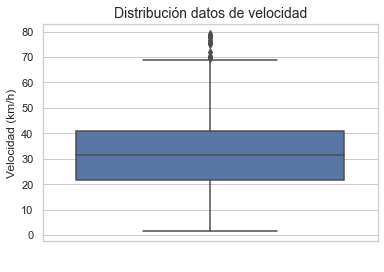

In [51]:
#Se realiza el boxplot de las velocidades en carro RED1
sns.set_theme(style="whitegrid")
boxplot = sns.boxplot(y=data1["velocity_k"])
boxplot.axes.set_title("Distribución datos de velocidad", fontsize=14)
boxplot.set_xlabel(" ", fontsize=12)
boxplot.set_ylabel("Velocidad (km/h)", fontsize=12)
#plt.show()
plt.savefig("C:/Users/user/Desktop/Tesis/Figuras/Pico2/01BoxplotGeneral.png", dpi = 300)

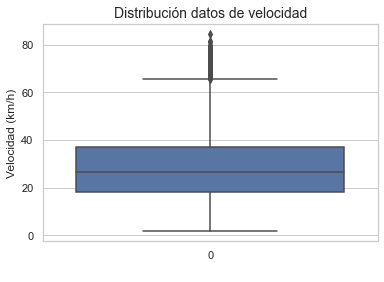

In [52]:
#Se realiza el boxplot de las velocidades en carro RED2
boxplot = sns.boxplot(data=data2["velocity_k"])
boxplot.axes.set_title("Distribución datos de velocidad", fontsize=14)
boxplot.set_xlabel(" ", fontsize=12)
boxplot.set_ylabel("Velocidad (km/h)", fontsize=12)
plt.show()

In [53]:
#La media aritmética se define como la suma de N elementos dividida entre N.
media1 = data1["velocity_k"].mean()
media2 = data2["velocity_k"].mean()
#La mediana es el valor que dentro del conjunto de datos es menor que el 50% de los datos y mayor que el 50% restante.
mediana1 = data1["velocity_k"].median()
mediana2 = data2["velocity_k"].median()
#La desviación típica mide la dispersión de los datos respecto a la media
desvstd1 = data1["velocity_k"].std(ddof=0)
desvstd2 = data2["velocity_k"].std(ddof=0)
var1 = data1["velocity_k"].var(ddof=0)
var2 = data2["velocity_k"].var(ddof=0)

print("Media1: ", media1)
print("Media2: ", media2)
print(" ")
print("Mediana1: ", mediana1)
print("Mediana2: ", mediana2)
print(" ")
print("Desviasión estandar1: ", desvstd1)
print("Desviasión estandar2: ", desvstd2)
print(" ")
print("Variancia1: ", var1)
print("Variancia2: ", var2)

Media1:  33.114725871129124
Media2:  28.526648455759144
 
Mediana1:  31.54421205680561
Mediana2:  26.663355606719467
 
Desviasión estandar1:  16.304911248658385
Desviasión estandar2:  14.526027652498701
 
Variancia1:  265.85013082662675
Variancia2:  211.00547936115694


Text(0, 0.5, 'Jerarquia segun PMMEP')

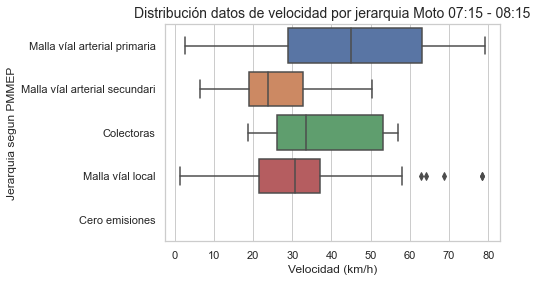

In [54]:
#Se realiza el boxplot de las velocidades en carro de la RED1 teniendo en cuenta la jerarquia de estas
boxplot = sns.boxplot(y=data1["JER_PMMEP"], x=data1["velocity_k"],
                     order=["Malla víal arterial primaria", "Malla víal arterial secundari", "Colectoras", "Malla víal local", "Cero emisiones"])
boxplot.axes.set_title("Distribución datos de velocidad por jerarquia Moto 07:15 - 08:15", fontsize=14)
boxplot.set_xlabel("Velocidad (km/h)", fontsize=12)
boxplot.set_ylabel("Jerarquia segun PMMEP", fontsize=12)
#plt.show()
#plt.savefig("G:/Mi unidad/Docencia/Maestria UNAL/Trabajo de grado/Tesis 2.0/Tesis/Articulo/Graficas/boxplot/Moto8P1.png", dpi = 600)

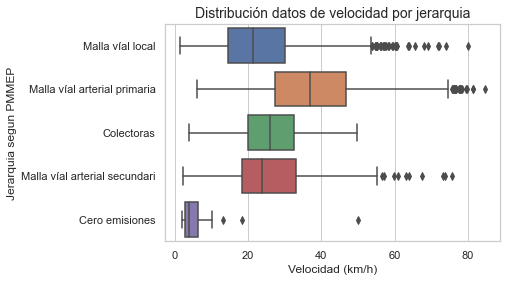

In [55]:
#Se realiza el boxplot de las velocidades en carro de la RED2 teniendo en cuenta la jerarquia de estas
boxplot = sns.boxplot(y=data2["JER_PMMEP"], x=data2["velocity_k"])
boxplot.axes.set_title("Distribución datos de velocidad por jerarquia", fontsize=14)
boxplot.set_xlabel("Velocidad (km/h)", fontsize=12)
boxplot.set_ylabel("Jerarquia segun PMMEP", fontsize=12)
plt.show()

In [56]:
data1.columns

Index(['DIR', 'NOMENCLATU', 'CATEGORIA', 'NOMEN', 'JER_POT', 'JER_PMMEP',
       'Long_KM', 'Shape_Leng', 'angulo1', 'angulo2', 'slope', 'FID',
       'velocity_k', 'geometry'],
      dtype='object')

In [57]:
#g = sns.catplot(y="JER_PMMEP", x="velocity_k",
#                hue="pico_valle",
#                data=data1, kind="box",
#                height=8.0, aspect=1.2);

In [58]:
#Se separan los datos para determinar los valores estadisticos de la red dividida por jerarquia
data1primaria = data1[(data1.JER_PMMEP == "Malla víal arterial primaria")]

data1secundari = data1[(data1.JER_PMMEP == "Malla víal arterial secundari")]

data1local = data1[(data1.JER_PMMEP == "Malla víal local")]

data1Colectoras = data1[(data1.JER_PMMEP == "Colectoras")]

data1Cero = data1[(data1.JER_PMMEP == "Cero emisiones")]

In [59]:
#Se calculan los valores medios segun la jerarquia
mediaprimaria = [data1primaria["velocity_k"].mean()]
mediasecundaria = [data1secundari["velocity_k"].mean()]
medialocal = [data1local["velocity_k"].mean()]
mediacolectora = [data1Colectoras["velocity_k"].mean()]
mediacero = [data1Cero["velocity_k"].mean()]
desvstdprimaria = [data1primaria["velocity_k"].std(ddof=0)]
desvstdsecundaria = [data1secundari["velocity_k"].std(ddof=0)]
desvstdlocal = [data1local["velocity_k"].std(ddof=0)]
desvstdcolectora = [data1Colectoras["velocity_k"].std(ddof=0)]
desvstdcero = [data1Cero["velocity_k"].std(ddof=0)]


df = pd.DataFrame()
df['hora 07:15 - 8:15'] = ['media', 'desv std']
df['primaria'] = [mediaprimaria, desvstdprimaria]
df['secundari'] = [mediasecundaria, desvstdsecundaria]
df['local'] = [medialocal, desvstdlocal]
df['Colectoras'] = [mediacolectora, desvstdcolectora]
df['Cero emisiones'] = [mediacero, desvstdcero]
df

,hora 07:15 - 8:15,primaria,secundari,local,Colectoras,Cero emisiones
0,media,[45.708703392172666],[25.16274786094586],[29.499987891755314],[37.836658085637914],[nan]
1,desv std,[20.01524858780904],[9.152308411239131],[12.780165030963019],[14.300178258343754],[nan]


<AxesSubplot:ylabel='velocity_k'>

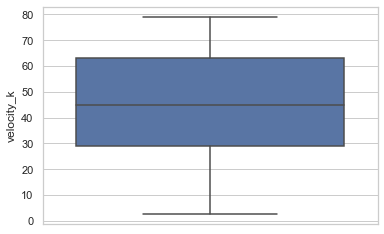

In [60]:
#Se realiza el boxplot de las velocidades en carro RED2
sns.boxplot(y=data1primaria["velocity_k"])

<AxesSubplot:ylabel='velocity_k'>

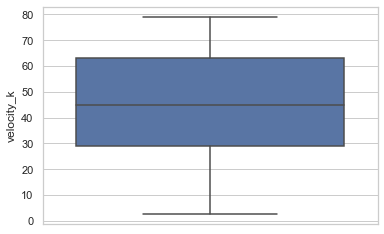

In [61]:
data1primaria1 = data1primaria[(data1primaria.velocity_k <= 82)]
sns.boxplot(y=data1primaria1["velocity_k"])

<AxesSubplot:ylabel='velocity_k'>

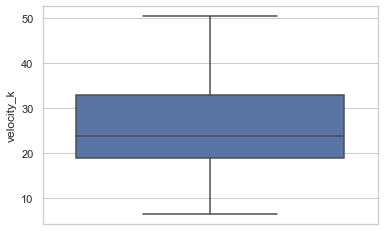

In [62]:
#Se realiza el boxplot de las velocidades en carro RED2
sns.boxplot(y=data1secundari["velocity_k"])

<AxesSubplot:ylabel='velocity_k'>

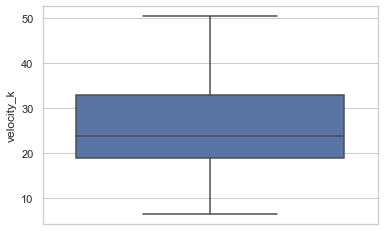

In [63]:
data1secundari1 = data1secundari[(data1secundari.velocity_k <= 60)]
sns.boxplot(y=data1secundari1["velocity_k"])

<AxesSubplot:ylabel='velocity_k'>

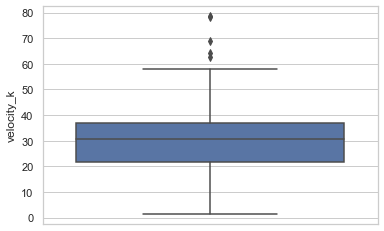

In [64]:
#Se realiza el boxplot de las velocidades en carro RED2
sns.boxplot(y=data1local["velocity_k"])

<AxesSubplot:ylabel='velocity_k'>

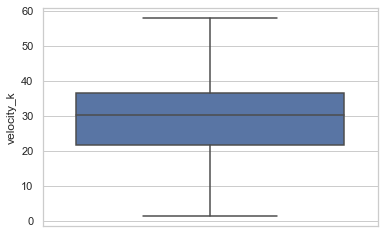

In [65]:
data1local1 = data1local[(data1local.velocity_k <= 60)]
sns.boxplot(y=data1local1["velocity_k"])

<AxesSubplot:ylabel='velocity_k'>

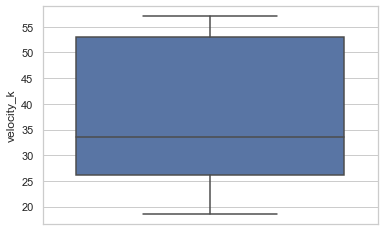

In [66]:
#Se realiza el boxplot de las velocidades en carro RED2
sns.boxplot(y=data1Colectoras["velocity_k"])

<AxesSubplot:ylabel='velocity_k'>

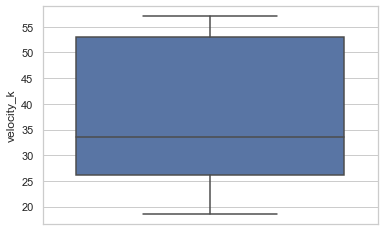

In [67]:
data1Colectoras1 = data1Colectoras[(data1Colectoras.velocity_k <= 65)]
sns.boxplot(y=data1Colectoras1["velocity_k"])

<AxesSubplot:ylabel='velocity_k'>

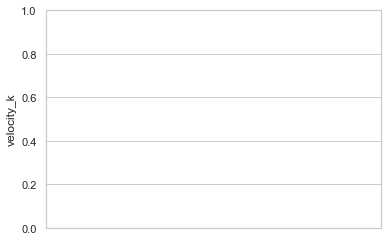

In [68]:
#Se realiza el boxplot de las velocidades en carro RED2
sns.boxplot(y=data1Cero["velocity_k"])

<AxesSubplot:ylabel='velocity_k'>

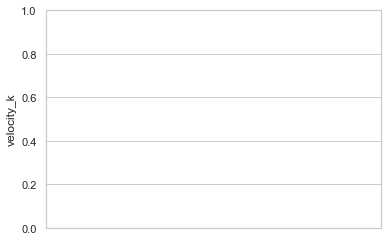

In [69]:
data1Cero1 = data1Cero[(data1Cero.velocity_k <= 10)]
sns.boxplot(y=data1Cero1["velocity_k"])

In [70]:
#Se calculan los valores medios segun la jerarquia
mediaprimaria1 = [data1primaria1["velocity_k"].mean()]
mediasecundaria1 = [data1secundari1["velocity_k"].mean()]
medialocal1 = [data1local1["velocity_k"].mean()]
mediacolectora1 = [data1Colectoras1["velocity_k"].mean()]
mediacero1 = [data1Cero1["velocity_k"].mean()]
desvstdprimaria1 = [data1primaria1["velocity_k"].std(ddof=0)]
desvstdsecundaria1 = [data1secundari1["velocity_k"].std(ddof=0)]
desvstdlocal1 = [data1local1["velocity_k"].std(ddof=0)]
desvstdcolectora1 = [data1Colectoras1["velocity_k"].std(ddof=0)]
desvstdcero1 = [data1Cero1["velocity_k"].std(ddof=0)]


df = pd.DataFrame()
df['Valores medios'] = ['media', 'desv std','media1', 'desv std1']
df['primaria'] = [mediaprimaria, desvstdprimaria, mediaprimaria1, desvstdprimaria1]
df['secundari'] = [mediasecundaria, desvstdsecundaria, mediasecundaria1, desvstdsecundaria1]
df['local'] = [medialocal, desvstdlocal, medialocal1, desvstdlocal1]
df['Colectoras'] = [mediacolectora, desvstdcolectora, mediacolectora1, desvstdcolectora1]
df['Cero emisiones'] = [mediacero, desvstdcero, mediacero1, desvstdcero1]
df

,Valores medios,primaria,secundari,local,Colectoras,Cero emisiones
0,media,[45.708703392172666],[25.16274786094586],[29.499987891755314],[37.836658085637914],[nan]
1,desv std,[20.01524858780904],[9.152308411239131],[12.780165030963019],[14.300178258343754],[nan]
2,media1,[45.708703392172666],[25.16274786094586],[28.705396376688203],[37.836658085637914],[nan]
3,desv std1,[20.01524858780904],[9.152308411239131],[11.50610915159404],[14.300178258343754],[nan]


In [26]:
dfi.export(df, 'C:/Users/user/Desktop/Tesis/Figuras/Pico2/03Dataframe.png')

## Regresión lineal

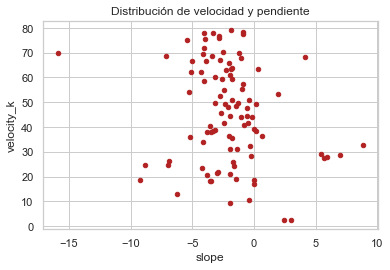

In [27]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

data1primaria.plot(
    x    = 'slope',
    y    = 'velocity_k',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Distribución de velocidad y pendiente');

In [28]:
# Correlación lineal entre las dos variables
# ==============================================================================
corr_test = pearsonr(x = data1primaria['slope'], y =  data1primaria['velocity_k'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  -0.19824931882774258
P-value:  0.05036433853971204


In [29]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX = data1primaria[["slope"]]
X_train = np.array(dataX)
y_train = data1primaria['velocity_k'].values

# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()

# Entrenamos nuestro modelo
regr.fit(X_train, y_train)

# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score R2: %.2f' % r2_score(y_train, y_pred))


Coefficients: 
 [-1.21644455]
Independent term: 
 43.21639554706759
Mean squared error: 384.87
Variance score R2: 0.04


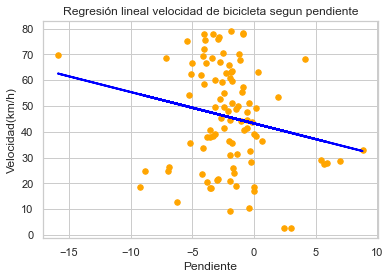

In [30]:
# Se grafican los puntos

# Se grafican los puntos
colores=['orange','blue']
tamanios=[30,60]

f1 = data1primaria['slope'].values
f2 = data1primaria['velocity_k'].values


plt.scatter(f1, f2, c='orange', s=tamanios[0])
plt.plot(X_train, y_pred, color='blue', linewidth=2)
plt.xlabel("Pendiente")
plt.ylabel("Velocidad(km/h)")
plt.title("Regresión lineal velocidad de bicicleta segun pendiente", fontsize=12)
plt.show()

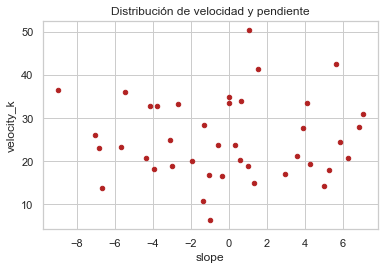

In [31]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

data1secundari.plot(
    x    = 'slope',
    y    = 'velocity_k',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Distribución de velocidad y pendiente');

In [32]:
# Correlación lineal entre las dos variables
# ==============================================================================
corr_test = pearsonr(x = data1secundari['slope'], y =  data1secundari['velocity_k'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  0.015093994501384246
P-value:  0.9253752206120813


In [33]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX = data1secundari[["slope"]]
X_train = np.array(dataX)
y_train = data1secundari['velocity_k'].values

# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()

# Entrenamos nuestro modelo
regr.fit(X_train, y_train)

# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score R2: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [0.03302737]
Independent term: 
 25.16750295483121
Mean squared error: 83.75
Variance score R2: 0.00


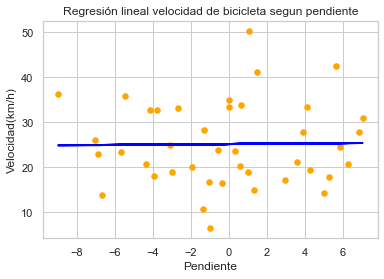

In [34]:
# Se grafican los puntos

# Se grafican los puntos
colores=['orange','blue']
tamanios=[30,60]

f1 = data1secundari['slope'].values
f2 = data1secundari['velocity_k'].values


plt.scatter(f1, f2, c='orange', s=tamanios[0])
plt.plot(X_train, y_pred, color='blue', linewidth=2)
plt.xlabel("Pendiente")
plt.ylabel("Velocidad(km/h)")
plt.title("Regresión lineal velocidad de bicicleta segun pendiente", fontsize=12)
plt.show()

In [35]:
# División de los datos en train y test
# ==============================================================================
X = data1primaria[['slope']]
y = data1primaria['velocity_k']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Creación del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

LinearRegression()

In [36]:
# Información del modelo
# ==============================================================================
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(X, y))

Intercept: [42.82400679]
Coeficiente: [('slope', -1.2012471750605842)]
Coeficiente de determinación R^2: 0.038848905609930595


In [37]:
# Error de test del modelo 
# ==============================================================================
predicciones = modelo.predict(X = X_test)
print(predicciones[0:3,])

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")

[[47.35918018]
 [46.66124917]
 [44.78790532]]

El error (rmse) de test es: 16.479633463622473


# Asignación de velocidad media a la red

A partir de la velocidad media calculada se asignan las velocidades a los arcos faltantes por velocidad

In [38]:
#Se define una nueva red para no afectar la original y se cambian los valores NaN por valores de 0
redfin=red1
redfin['velocity_k'] = redfin['velocity_k'].fillna(0)
redfin

,DIR,NOMENCLATU,CATEGORIA,NOMEN,JER_POT,JER_PMMEP,Long_KM,Shape_Leng,angulo1,angulo2,slope,FID,velocity_k,geometry
0,1,CALLE 20,CALLE-PRIMER-ORDEN,Cl 20,Malla víal local,Malla víal local,0.068802,68.801895,36.123963,36.445994,1.828875,0,0.0,"LINESTRING (871466.763 982507.100, 871475.997 ..."
1,1,CALLE 19,CALLE-PRIMER-ORDEN,Cl 19,Malla víal arterial primaria,Malla víal arterial primaria,0.089808,89.808234,199.524533,216.501489,-4.077699,1,0.0,"LINESTRING (871505.831 982644.298, 871503.591 ..."
2,1,CARRERA 4,CARRERA-PRIMER-ORDEN,Cr 4,Malla víal arterial secundari,Colectoras,0.102935,102.934913,302.580455,303.041108,4.033832,2,0.0,"LINESTRING (871535.268 982798.544, 871524.511 ..."
3,1,CARRERA 4,CARRERA-PRIMER-ORDEN,Cr 4,Malla víal arterial primaria,Malla víal arterial secundari,0.117046,117.046090,114.747128,114.807639,-5.290759,3,0.0,"LINESTRING (871431.414 983044.357, 871436.073 ..."
4,1,CARRERA 4,CARRERA-PRIMER-ORDEN,Cr 4,Malla víal arterial primaria,Malla víal arterial primaria,0.114319,114.318731,117.520102,118.003455,-2.102832,4,0.0,"LINESTRING (871398.372 983211.089, 871431.759 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27932,1,CARRERA 27 SUR,CARRERA-PRIMER-ORDEN,Cr 27 sur,Malla víal local,Malla víal local,0.020000,19.999996,312.258774,312.258774,-1.806031,27932,0.0,"LINESTRING (869194.863 980597.050, 869180.060 ..."
27933,1,CARRERA 27 SUR,CARRERA-PRIMER-ORDEN,Cr 27 sur,Malla víal local,Malla víal local,0.020000,19.999996,132.258774,132.258774,1.806031,27933,0.0,"LINESTRING (869180.060 980610.499, 869194.863 ..."
27934,1,CALLE 94,CALLE-PRIMER-ORDEN,Cl 94,Malla víal local,Malla víal local,0.019720,19.719950,186.866659,186.866659,2.216708,27934,0.0,"LINESTRING (878100.150 981265.301, 878097.793 ..."
27935,1,CALLE 94,CALLE-PRIMER-ORDEN,Cl 94,Malla víal local,Malla víal local,0.019720,19.719950,6.866659,6.866659,-2.216708,27935,0.0,"LINESTRING (878097.793 981245.722, 878100.150 ..."


In [39]:
#Se busca celda por celda la jerarquia y que tengan valores de 0 para una vez identificados se asignan las velocidades media calculadas
for i in range(0, len(redfin)):
    if  ((redfin.loc[i,'JER_PMMEP'] == "Malla víal arterial primaria") & (redfin.loc[i,'velocity_k'] == 0)):
        redfin.loc[i,'velocity_k'] = mediaprimaria1
    elif ((redfin.loc[i,'JER_PMMEP'] == "Malla víal arterial secundari") & (redfin.loc[i,'velocity_k'] == 0)):
        redfin.loc[i,'velocity_k'] = mediasecundaria1
    elif ((redfin.loc[i,'JER_PMMEP'] == "Malla víal local") & (redfin.loc[i,'velocity_k'] == 0)):
        redfin.loc[i,'velocity_k'] = medialocal1
    elif ((redfin.loc[i,'JER_PMMEP'] == "Colectoras") & (redfin.loc[i,'velocity_k'] == 0)):
        redfin.loc[i,'velocity_k'] = mediacolectora1
    elif ((redfin.loc[i,'JER_PMMEP'] == "Cero emisiones") & (redfin.loc[i,'velocity_k'] == 0)):
        redfin.loc[i,'velocity_k'] = 4.32

In [40]:
redfin["long_m"] = redfin['geometry'].length
redfin["TV"] = ((redfin['long_m']/redfin['velocity_k'])*(60/1000))
redfin

,DIR,NOMENCLATU,CATEGORIA,NOMEN,JER_POT,JER_PMMEP,Long_KM,Shape_Leng,angulo1,angulo2,slope,FID,velocity_k,geometry,long_m,TV
0,1,CALLE 20,CALLE-PRIMER-ORDEN,Cl 20,Malla víal local,Malla víal local,0.068802,68.801895,36.123963,36.445994,1.828875,0,28.705396,"LINESTRING (871466.763 982507.100, 871475.997 ...",68.801895,0.143810
1,1,CALLE 19,CALLE-PRIMER-ORDEN,Cl 19,Malla víal arterial primaria,Malla víal arterial primaria,0.089808,89.808234,199.524533,216.501489,-4.077699,1,45.708703,"LINESTRING (871505.831 982644.298, 871503.591 ...",89.808234,0.117888
2,1,CARRERA 4,CARRERA-PRIMER-ORDEN,Cr 4,Malla víal arterial secundari,Colectoras,0.102935,102.934913,302.580455,303.041108,4.033832,2,37.836658,"LINESTRING (871535.268 982798.544, 871524.511 ...",102.934913,0.163230
3,1,CARRERA 4,CARRERA-PRIMER-ORDEN,Cr 4,Malla víal arterial primaria,Malla víal arterial secundari,0.117046,117.046090,114.747128,114.807639,-5.290759,3,25.162748,"LINESTRING (871431.414 983044.357, 871436.073 ...",117.046090,0.279094
4,1,CARRERA 4,CARRERA-PRIMER-ORDEN,Cr 4,Malla víal arterial primaria,Malla víal arterial primaria,0.114319,114.318731,117.520102,118.003455,-2.102832,4,45.708703,"LINESTRING (871398.372 983211.089, 871431.759 ...",114.318731,0.150062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27932,1,CARRERA 27 SUR,CARRERA-PRIMER-ORDEN,Cr 27 sur,Malla víal local,Malla víal local,0.020000,19.999996,312.258774,312.258774,-1.806031,27932,28.705396,"LINESTRING (869194.863 980597.050, 869180.060 ...",19.999996,0.041804
27933,1,CARRERA 27 SUR,CARRERA-PRIMER-ORDEN,Cr 27 sur,Malla víal local,Malla víal local,0.020000,19.999996,132.258774,132.258774,1.806031,27933,28.705396,"LINESTRING (869180.060 980610.499, 869194.863 ...",19.999996,0.041804
27934,1,CALLE 94,CALLE-PRIMER-ORDEN,Cl 94,Malla víal local,Malla víal local,0.019720,19.719950,186.866659,186.866659,2.216708,27934,28.705396,"LINESTRING (878100.150 981265.301, 878097.793 ...",19.719950,0.041219
27935,1,CALLE 94,CALLE-PRIMER-ORDEN,Cl 94,Malla víal local,Malla víal local,0.019720,19.719950,6.866659,6.866659,-2.216708,27935,28.705396,"LINESTRING (878097.793 981245.722, 878100.150 ...",19.719950,0.041219


In [41]:
redfin.to_file("G:/Mi unidad/Docencia/Maestria UNAL/Trabajo de grado/Tesis 2.0/Tesis/Red_Inf_Vial/Red_Vel_Franjas/Moto/valle2.shp")

In [42]:
gdf = redfin.to_crs({"init":"EPSG:4326"})
gdf.to_file("G:/Mi unidad/Docencia/Maestria UNAL/Trabajo de grado/Tesis 2.0/Tesis/Red_Inf_Vial/Red_Vel_Franjas/Moto/WGS84/valle2.shp")